Mohammad Mazrouei  
4003613056

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, cdist
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

import torch
import cv2
from torchvision.transforms import Compose, ToTensor
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import mahotas as mt
from skimage.feature import corner_harris, corner_subpix, corner_peaks, CENSURE
import scipy.ndimage as ndi
from scipy.spatial import distance

# Pre-Process

In [2]:
data = pd.read_csv('./leaves.csv', header=None)
columns = ['Label'] + ['NO'] + [f'Feature_{i - 1}' for i in range(2, data.shape[1])]
data.columns = columns

print(data.shape)
data.head()

(340, 16)


,Label,NO,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


In [3]:
X = data.drop(columns=['Label', 'NO'])
y = data['Label']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [4]:
# Pre Process
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification

In [5]:
def run(classifier, rep=1):
    accuracies = []
    time = 0
    
    for _ in range(rep):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        start = timeit.default_timer()
        classifier.fit(X_train, y_train)
        end = timeit.default_timer()
        y_pred = classifier.predict(X_test)

        time += end - start
        accuracies.append(accuracy_score(y_test, y_pred))
        report = classification_report(y_test, y_pred, zero_division=1)

    avg_time = time / rep
    print(f'average time: {round(avg_time, 6)} sec')
    avg_accuracy = sum(accuracies) / rep
    print(f'average accuracy: {round(avg_accuracy, 6)}\n')
    print(report)
    
    plt.figure(figsize=(8, 6))
    plt.boxplot(accuracies)
    plt.title('Box Plot of Accuracies')
    plt.ylabel('Accuracy')
    plt.show()

## KNN

average time: 0.000393 sec
average accuracy: 0.627941

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.30      1.00      0.46         3
           2       0.75      0.60      0.67         5
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         5
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         2
           8       0.57      0.80      0.67         5
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         9
          11       0.50      0.50      0.50         2
          12       0.80      0.80      0.80         5
          13       0.40      1.00      0.57         2
          14       1.00      1.00      1.00         3
          15       1.00      0.25      0.40         4
          16       1.00      1.00      1.00         1
          17       0.67   

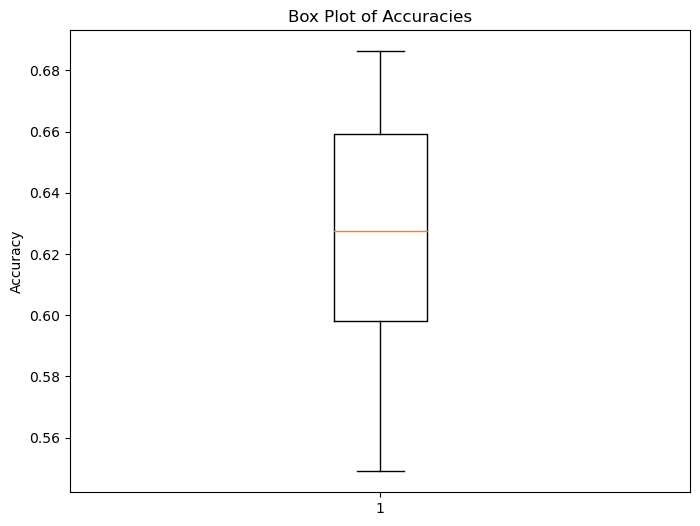

In [6]:
knn = KNeighborsClassifier(n_neighbors=4)
run(knn, 20)

## Decision Tree

average time: 0.002278 sec
average accuracy: 0.592647

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.50      0.20      0.29         5
           2       0.00      0.00      1.00         1
           3       0.00      0.00      1.00         1
           4       0.83      0.71      0.77         7
           5       0.67      0.67      0.67         3
           6       0.75      0.50      0.60         6
           7       1.00      1.00      1.00         3
           8       0.00      0.00      1.00         3
           9       0.50      0.67      0.57         3
          10       0.89      1.00      0.94         8
          11       0.50      0.50      0.50         2
          12       0.40      0.67      0.50         3
          13       0.50      1.00      0.67         3
          14       1.00      0.50      0.67         2
          15       1.00      0.40      0.57         5
          16       0.67   

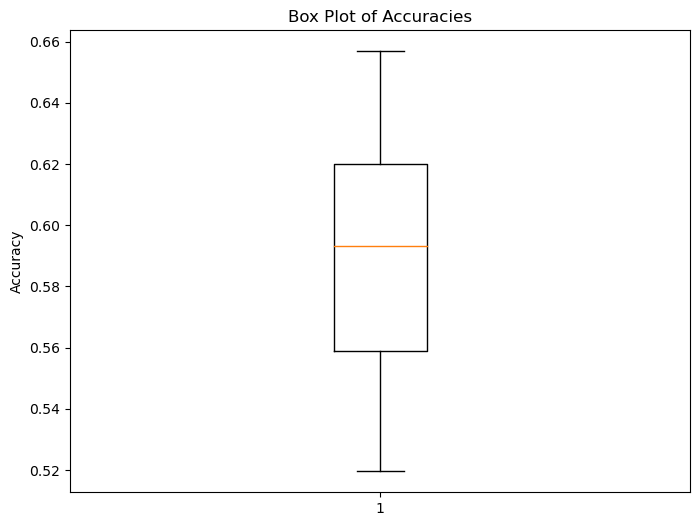

In [7]:
decision_tree = DecisionTreeClassifier()
run(decision_tree, 20)

## Random Forest

average time: 0.176263 sec
average accuracy: 0.726961

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.80      0.67      0.73         6
           2       1.00      0.33      0.50         3
           3       1.00      0.00      0.00         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         3
           6       0.67      0.67      0.67         3
           7       1.00      1.00      1.00         3
           8       0.20      1.00      0.33         1
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         8
          11       1.00      0.43      0.60         7
          12       0.50      1.00      0.67         2
          13       0.38      1.00      0.55         3
          14       1.00      1.00      1.00         2
          15       0.80      1.00      0.89         4
          16       1.00   

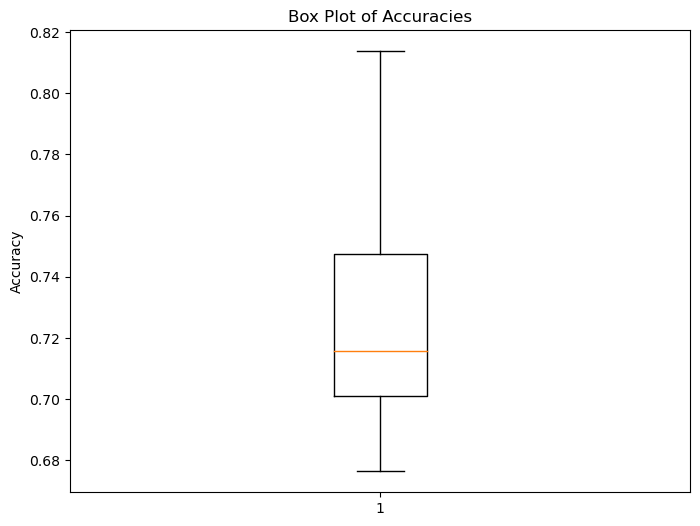

In [16]:
random_forest = RandomForestClassifier(n_estimators=250, max_depth=16, min_samples_leaf=2, min_samples_split=5)
run(random_forest, 20)

## Logistic Regression

average time: 0.012179 sec
average accuracy: 0.72402

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.25      1.00      0.40         1
           2       1.00      0.60      0.75         5
           3       1.00      0.00      0.00         4
           4       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         2
           6       0.50      0.25      0.33         4
           7       1.00      1.00      1.00         2
           8       1.00      0.33      0.50         9
           9       0.50      0.75      0.60         4
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       0.57      1.00      0.73         4
          13       1.00      0.20      0.33         5
          14       1.00      1.00      1.00         3
          15       0.80      0.80      0.80         5
          16       0.80    

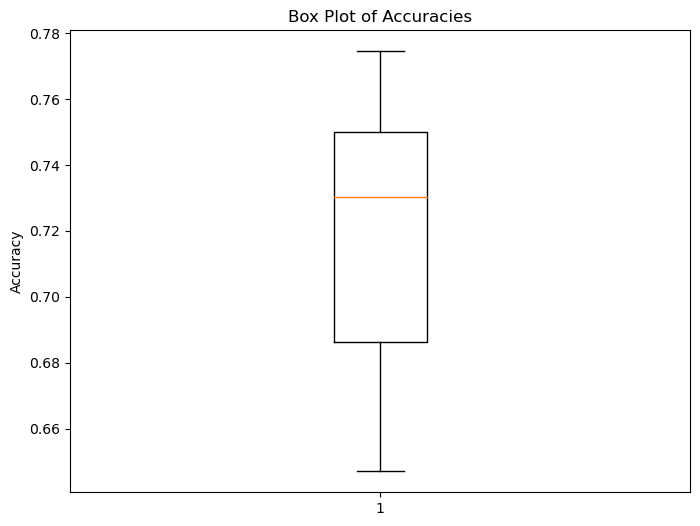

In [17]:
logistic_regression = LogisticRegression(max_iter=1000)
run(logistic_regression, 20)

## SVM

average time: 0.004086 sec
average accuracy: 0.576961

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       1.00      0.00      0.00         2
           2       1.00      0.25      0.40         4
           3       1.00      0.00      0.00         2
           4       0.17      1.00      0.29         1
           5       1.00      1.00      1.00         1
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         2
           8       0.18      0.67      0.29         3
           9       1.00      0.60      0.75         5
          10       1.00      1.00      1.00         7
          11       1.00      0.17      0.29         6
          12       0.75      0.50      0.60         6
          13       0.43      1.00      0.60         3
          14       1.00      1.00      1.00         4
          15       0.33      0.25      0.29         4
          17       0.60   

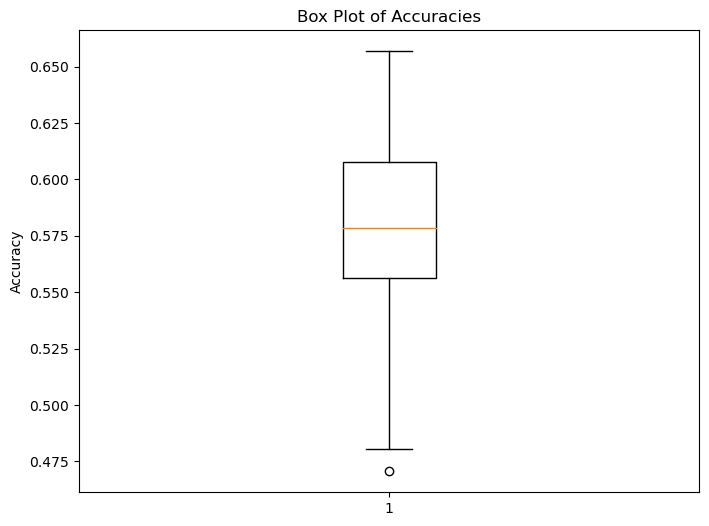

In [18]:
svm = SVC()
run(svm, 20)

## Naive Bayes

average time: 0.000873 sec
average accuracy: 0.701961

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       1.00      0.33      0.50         3
           2       0.50      1.00      0.67         1
           3       0.00      1.00      0.00         0
           4       1.00      0.89      0.94         9
           5       0.33      1.00      0.50         1
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         3
           8       0.50      0.40      0.44         5
           9       0.71      1.00      0.83         5
          10       1.00      1.00      1.00         1
          11       0.60      1.00      0.75         3
          12       1.00      0.25      0.40         8
          13       0.60      1.00      0.75         3
          14       1.00      0.67      0.80         3
          15       0.50      0.40      0.44         5
          16       1.00   

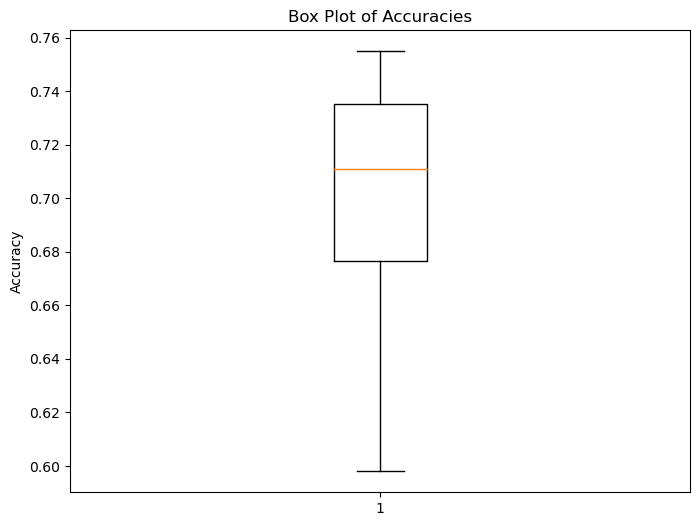

In [21]:
naive_bayes = GaussianNB()
run(naive_bayes, 20)

## XGBoost

average time: 0.370117 sec
average accuracy: 0.656863

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.40      0.50      0.44         4
           2       1.00      0.50      0.67         2
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         4
           5       0.50      0.50      0.50         2
           6       0.33      0.50      0.40         2
           7       1.00      1.00      1.00         3
           8       0.33      1.00      0.50         2
           9       0.67      0.67      0.67         3
          10       0.86      1.00      0.92         6
          11       0.50      1.00      0.67         2
          12       0.25      0.33      0.29         3
          13       0.00      0.00      1.00         3
          14       1.00      0.50      0.67         4
          15       0.75      1.00      0.86         3
          16       0.75   

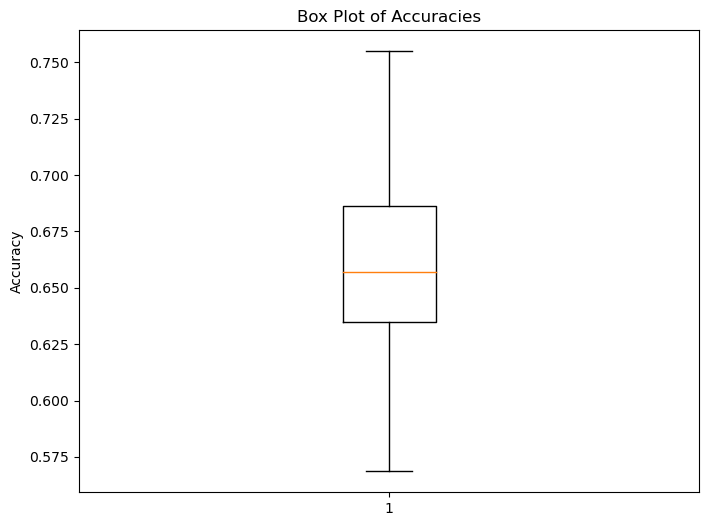

In [22]:
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
run(xgboost, 20)

## LGBM

average time: 0.287288 sec
average accuracy: 0.678431

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         4
           3       0.00      0.00      1.00         1
           4       1.00      1.00      1.00         5
           5       0.00      0.00      1.00         2
           6       0.50      0.50      0.50         4
           7       1.00      1.00      1.00         4
           8       0.75      0.60      0.67         5
           9       0.67      0.67      0.67         3
          10       0.67      1.00      0.80         4
          11       0.00      0.00      1.00         2
          12       0.67      0.67      0.67         6
          13       0.80      0.80      0.80         5
          14       0.67      1.00      0.80         2
          15       1.00      0.20      0.33         5
          16       1.00   

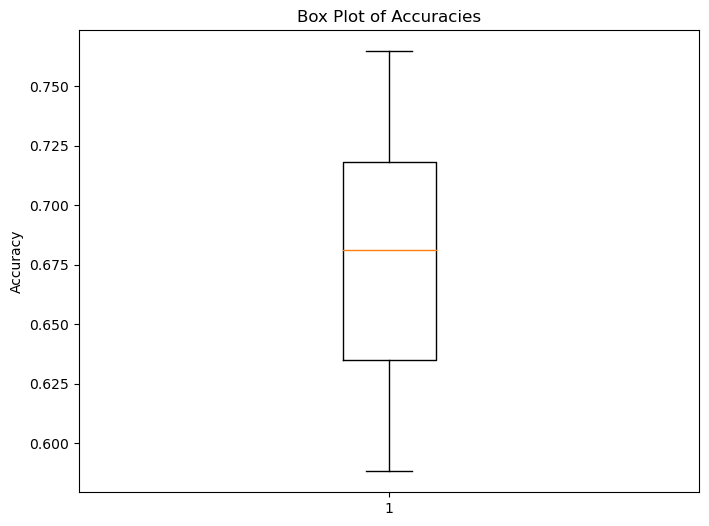

In [23]:
lgb = LGBMClassifier(verbose=-1)
run(lgb, 20)

# Clustering

**Adjusted Rand Index (ARI):** Measures the similarity between two data clusterings by considering all pairs of samples and counting pairs  that are assigned in the same or different clusters in the predicted and true clusterings.  

**Normalized Mutual Information (NMI):** Measures the amount of shared information between the predicted and true clusters. It is normalized   to be between 0 (no mutual information) and 1 (perfect correlation).  

**Homogeneity:** Each cluster contains only members of a single class.  

**Completeness:** All members of a given class are assigned to the same cluster.  

**V-Measure:** Harmonic mean of homogeneity and completeness.  

In [31]:
def dunn_index(points, labels):
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    
    if n_clusters == 1:
        return 0
    
    # Compute all pairwise distances
    distances = pdist(points)
    max_intra_cluster_dist = 0
    min_inter_cluster_dist = np.inf
    
    for i in range(n_clusters):
        cluster_i = points[labels == unique_labels[i]]
        if len(cluster_i) > 1:
            intra_distances = pdist(cluster_i)
            max_intra_cluster_dist = max(max_intra_cluster_dist, intra_distances.max())
    
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = points[labels == unique_labels[i]]
            cluster_j = points[labels == unique_labels[j]]
            inter_distances = cdist(cluster_i, cluster_j)
            min_inter_cluster_dist = min(min_inter_cluster_dist, inter_distances.min())
    
    dunn_index_value = min_inter_cluster_dist / max_intra_cluster_dist
    return dunn_index_value
    

def run0(model, rep=1):
    silhouette = dunn = ari = nmi = homogeneity = completeness = v_measure = 0
    time = 0
    
    for _ in range(rep):
        start = timeit.default_timer()
        clusters = model.fit_predict(X)
        end = timeit.default_timer()
        
        time += end - start

        silhouette += silhouette_score(X, clusters)
        dunn += dunn_index(X, clusters)
        ari += adjusted_rand_score(data['Label'], clusters)
        nmi += normalized_mutual_info_score(data['Label'], clusters)
        homogeneity += homogeneity_score(data['Label'], clusters)
        completeness += completeness_score(data['Label'], clusters)
        v_measure += v_measure_score(data['Label'], clusters)

    data2 = pd.DataFrame()
    data2['Label'] = data['Label']
    data2['Cluster'] = clusters
    print(data2.head(22))
    print()
    
    print("Time:         ", round(time / rep, 6), "sec")
    print("Silhouette:   ", round(silhouette / rep, 6))
    print("Dunn Index:   ", round(dunn / rep, 6))
    print("ARI:          ", round(ari / rep, 6))
    print("NMI:          ", round(nmi / rep, 6))
    print("Homogeneity:  ", round(homogeneity / rep, 6))
    print("Completeness: ", round(completeness / rep, 6))
    print("V-Measure:    ", round(v_measure / rep, 6))

## K-Means

In [32]:
kmeans = KMeans(n_clusters=30)
run0(kmeans)

    Label  Cluster
0       1        6
1       1       14
2       1       14
3       1       14
4       1       25
5       1       14
6       1       25
7       1       14
8       1       25
9       1       25
10      1       14
11      1       14
12      2       23
13      2        2
14      2        2
15      2        2
16      2        2
17      2        2
18      2        2
19      2        2
20      2       23
21      2       12

Time:          0.035555 sec
Silhouette:    0.327772
Dunn Index:    0.03178
ARI:           0.257296
NMI:           0.63468
Homogeneity:   0.597118
Completeness:  0.677284
V-Measure:     0.63468


/home/mohammad/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Agglomerative

In [33]:
agg = AgglomerativeClustering(n_clusters=30)
run0(agg)

    Label  Cluster
0       1       25
1       1       19
2       1       19
3       1       19
4       1       19
5       1       19
6       1       19
7       1       19
8       1       19
9       1       18
10      1       19
11      1       19
12      2       18
13      2       18
14      2       18
15      2        9
16      2       18
17      2        9
18      2        9
19      2       18
20      2       18
21      2       10

Time:          0.003783 sec
Silhouette:    0.311913
Dunn Index:    0.073077
ARI:           0.272858
NMI:           0.637546
Homogeneity:   0.602958
Completeness:  0.676342
V-Measure:     0.637546


## Spectral Clustering

In [34]:
spectral_clustering = SpectralClustering(n_clusters=30, affinity='nearest_neighbors')
run0(spectral_clustering)

/home/mohammad/.local/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


    Label  Cluster
0       1       21
1       1        9
2       1       23
3       1       23
4       1       23
5       1       23
6       1       23
7       1       23
8       1       14
9       1       14
10      1       23
11      1       23
12      2        4
13      2        4
14      2        4
15      2       17
16      2        4
17      2       17
18      2       25
19      2        4
20      2       22
21      2       26

Time:          0.862169 sec
Silhouette:    0.290259
Dunn Index:    0.005847
ARI:           0.366698
NMI:           0.686631
Homogeneity:   0.683558
Completeness:  0.689732
V-Measure:     0.686631


## Gaussian Mixture

In [35]:
gmm = GaussianMixture(n_components=30)
run0(gmm)

    Label  Cluster
0       1       26
1       1       26
2       1       11
3       1       11
4       1       11
5       1       11
6       1       11
7       1       26
8       1       11
9       1       11
10      1       11
11      1       11
12      2       25
13      2       25
14      2        0
15      2        0
16      2       25
17      2        0
18      2        0
19      2        0
20      2       25
21      2       26

Time:          0.08351 sec
Silhouette:    0.275197
Dunn Index:    0.025962
ARI:           0.302362
NMI:           0.675867
Homogeneity:   0.640824
Completeness:  0.714964
V-Measure:     0.675867


In [20]:
optics = OPTICS(min_samples=5, xi=0.5, min_cluster_size=0.05)
run0(optics)

    Label  Cluster
0       1        0
1       1        0
2       1        0
3       1        0
4       1        0
5       1        0
6       1        0
7       1        0
8       1        0
9       1        0
10      1        0
11      1        0
12      2        0
13      2        0
14      2        0
15      2        0
16      2        0
17      2        0
18      2        0
19      2        0
20      2        0
21      2        0

Silhouette:    0.767132
Dunn Index:    0.11773
ARI:           0.013647
NMI:           0.169561
Homogeneity:   0.093069
Completeness:  0.952029
V-Measure:     0.169561


# Feature Extraction

In [36]:
def extract_color_histogram(image_path, bins=(8, 8, 8)):
    image = cv2.imread(image_path)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [37]:
def extract_shape_features(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        return [0, 0, 0, 0, 0, 0, 0]

    contour = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    moments = cv2.moments(contour)
    hu_moments = cv2.HuMoments(moments).flatten()
    
    return [area, perimeter] + hu_moments.tolist()

In [38]:
# Load the pre-trained model
model = models.resnet50(pretrained=True)
model.eval()

# Image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to extract features using a pre-trained model
def extract_deep_features(image_path, model, transform):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    with torch.no_grad():
        features = model(image)
    return features.flatten().numpy()

/home/mohammad/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/mohammad/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [39]:
def extract_feature(image_path):
    main_img = cv2.imread(image_path)

    image = cv2.imread(image_path)
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(gray_image, 112, 255, cv2.THRESH_BINARY)

    # using image processing module of scipy to find the center of the leaf
    c1, c2, c3 = ndi.center_of_mass(image)
    c4, c5 = ndi.center_of_mass(gray_image)

    # Preprocessing

    # Convert the image to RGB
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)

    # Convert the image to Grayscale
    gray = cv2.cvtColor(main_img,cv2.COLOR_BGR2GRAY)
    
    # Perform thresholding
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find contours
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get the largest contour (assumed to be the leaf)
    leaf_contour = max(contours, key=cv2.contourArea)
    

    # Shape based features
    x, y, w, h = cv2.boundingRect(leaf_contour)
    area = cv2.contourArea(leaf_contour)
    perimeter = cv2.arcLength(leaf_contour, True)
    x, y, w, h = cv2.boundingRect(leaf_contour)
    physiological_length = max(w, h)
    physiological_width = min(w, h)
    aspect_ratio = float(physiological_length) / physiological_width
    rectangularity = area / (physiological_length * physiological_width)
    circularity = (4 * np.pi * area) / (perimeter ** 2)
    convex_area = cv2.contourArea(cv2.convexHull(leaf_contour))
    convex_ratio = area / convex_area


    # Color based features
    b, g, r = cv2.split(img)

    # Calculate mean and standard deviation for each channel
    mean_b = np.mean(b)
    mean_g = np.mean(g)
    mean_r = np.mean(r)

    std_b = np.std(b)
    std_g = np.std(g)
    std_r = np.std(r)

    
    # Texture based features
    textures = mt.features.haralick(gray)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]
    

    features = [area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,w,h,convex_area,convex_ratio,
            mean_r,mean_g,mean_b,std_r,std_g,std_b,contrast,correlation,inverse_diff_moments,entropy,c1, c2, c3, c4, c5]
    
    return features

In [40]:
image_dir = '../leaves'

features = []

# Loop over the images and extract felatures
for image_class in sorted(os.listdir(image_dir)):
    image_class_name = os.path.join(image_dir, image_class)
    if int(image_class[:2]) >= 16 and int(image_class[:2]) <= 21:
        continue
    if int(image_class[:2]) >= 37:
        continue
    for image_name in sorted(os.listdir(image_class_name)):
        image_path = os.path.join(image_class_name, image_name)

        #hist_features = extract_color_histogram(image_path)
        #shape_features = extract_shape_features(image_path)
        deep_features = extract_deep_features(image_path, model, transform)
        feature = extract_feature(image_path)
        combined_features = np.hstack([deep_features, feature])
        features.append(combined_features)
        #features.append(feature)
        

features_df = pd.DataFrame(features)

# Combine the features with the original data
combined_data = pd.concat([data, features_df], axis=1)
columns = ['Label'] + ['NO'] + [f'Feature_{i - 1}' for i in range(2, combined_data.shape[1])]
combined_data.columns = columns
combined_data.head()

,Label,NO,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_1031,Feature_1032,Feature_1033,Feature_1034,Feature_1035,Feature_1036,Feature_1037,Feature_1038,Feature_1039,Feature_1040
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,...,48.800180,4.077801,0.997188,0.528750,9.161030,453.366295,356.223146,1.147280,452.334369,356.800460
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,...,39.096059,4.335774,0.996491,0.519658,9.111321,450.414812,358.213874,1.182691,449.218342,358.239644
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,...,35.216345,4.591384,0.996212,0.498871,9.235748,451.694494,351.805026,1.186545,450.627998,351.176681
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,...,41.651562,5.693135,0.996041,0.472996,9.209071,452.656454,362.518707,1.180320,452.332362,362.786974
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,...,31.857746,4.787491,0.995451,0.487750,8.944949,453.700415,360.100587,1.176953,453.284900,360.213296


In [41]:
X = combined_data.drop(columns=['Label', 'NO'])
y = combined_data['Label']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Classificatin (image features)

## KNN

average time: 0.000656 sec
average accuracy: 0.894608

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.80      1.00      0.89         4
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.75      1.00      0.86         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         2
          12       1.00      0.83      0.91         6
          13       1.00      0.67      0.80         6
          14       1.00      1.00      1.00         4
          15       1.00      0.67      0.80         3
          16       1.00   

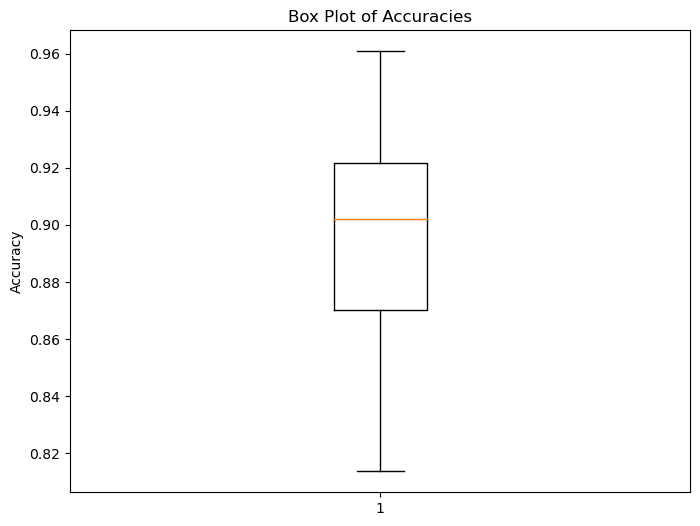

In [42]:
knn = KNeighborsClassifier(n_neighbors=4)
run(knn, 20)

## Decision Tree

average time: 0.20444 sec
average accuracy: 0.571078

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.40      1.00      0.57         2
           2       0.29      0.67      0.40         3
           3       1.00      0.00      0.00         1
           4       0.50      0.33      0.40         3
           5       0.50      0.50      0.50         2
           6       0.33      0.50      0.40         2
           7       1.00      1.00      1.00         3
           8       0.00      1.00      0.00         0
           9       0.60      0.38      0.46         8
          10       1.00      1.00      1.00         7
          11       0.60      0.60      0.60         5
          12       0.71      0.83      0.77         6
          13       1.00      0.25      0.40         4
          14       0.33      0.67      0.44         3
          15       0.50      0.17      0.25         6
          16       0.00    

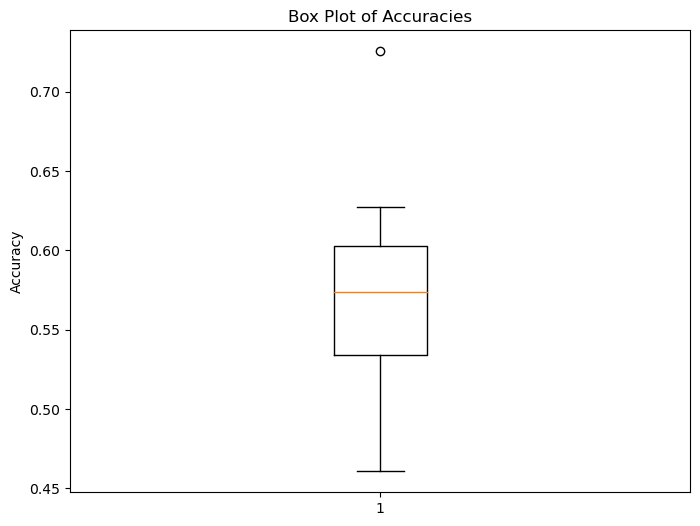

In [44]:
decision_tree = DecisionTreeClassifier()
run(decision_tree, 20)

## Random Forest

average time: 0.415976 sec
average accuracy: 0.917647

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         5
          12       1.00      0.75      0.86         4
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         2
          15       0.80      1.00      0.89         4
          16       1.00   

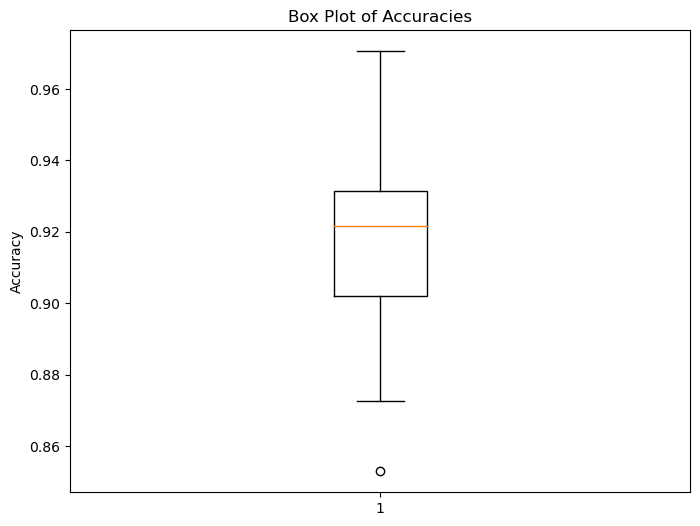

In [45]:
random_forest = RandomForestClassifier()
#random_forest = RandomForestClassifier(n_estimators=200, max_depth=12, min_samples_leaf=2, min_samples_split=5)
run(random_forest, 20)

## Logistic Regression

average time: 1.224191 sec
average accuracy: 0.958824

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.83      0.91         6
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         3
          12       0.88      1.00      0.93         7
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
          16       1.00   

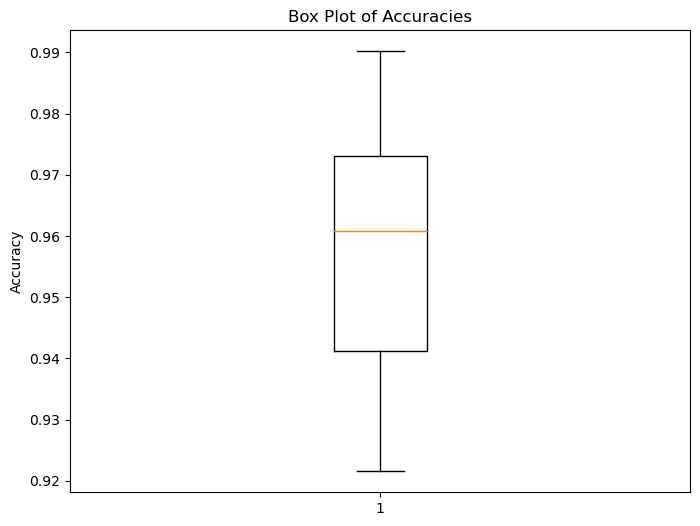

In [49]:
logistic_regression = LogisticRegression(max_iter=1500)
run(logistic_regression, 20)

## SVM

average time: 0.02021 sec
average accuracy: 0.940196

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         4
           8       1.00      0.83      0.91         6
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      0.75      0.86         4
          12       0.67      0.50      0.57         4
          13       0.50      0.33      0.40         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00    

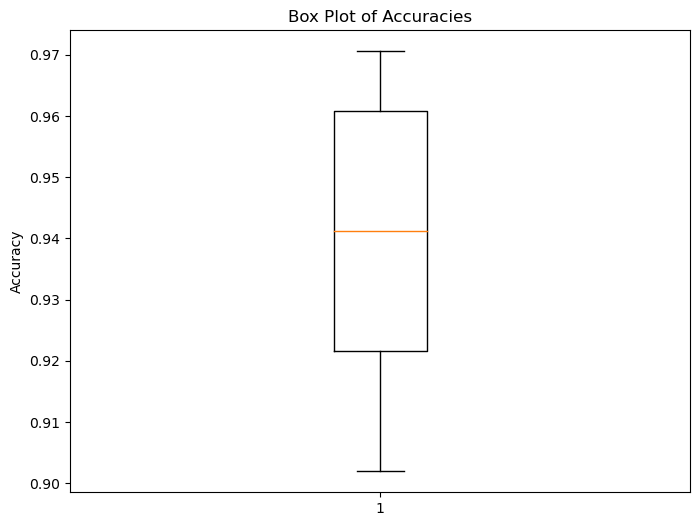

In [50]:
svm = SVC()
run(svm, 20)

## Naive Bayes

average time: 0.002438 sec
average accuracy: 0.871569

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      0.00      0.00         5
           4       1.00      1.00      1.00         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       0.33      1.00      0.50         1
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         4
          12       0.50      1.00      0.67         4
          13       0.60      0.75      0.67         4
          14       0.75      1.00      0.86         3
          15       0.80      1.00      0.89         4
          16       1.00   

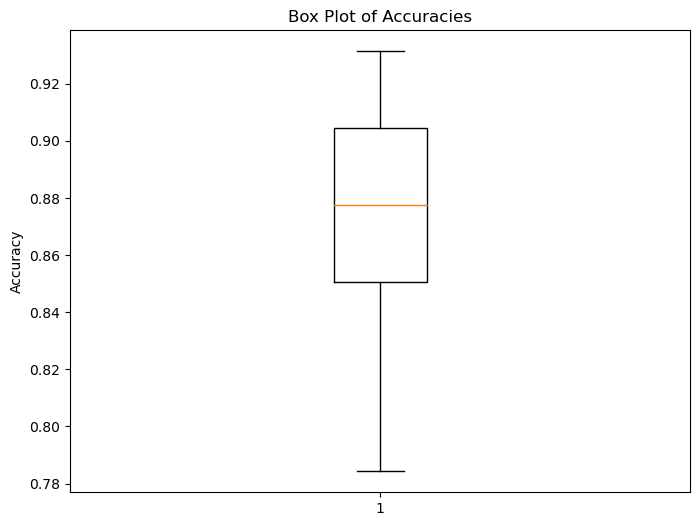

In [51]:
naive_bayes = GaussianNB()
run(naive_bayes, 20)

## XGBoost

average time: 4.344252 sec
average accuracy: 0.837745

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.50      0.50      0.50         2
           2       1.00      0.80      0.89         5
           3       0.50      0.50      0.50         2
           4       0.60      1.00      0.75         3
           5       1.00      0.25      0.40         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       0.83      0.83      0.83         6
           9       0.67      1.00      0.80         2
          10       0.83      1.00      0.91         5
          11       1.00      1.00      1.00         3
          12       0.67      0.50      0.57         4
          13       0.75      1.00      0.86         3
          14       1.00      0.25      0.40         4
          15       1.00      1.00      1.00         3
          16       1.00   

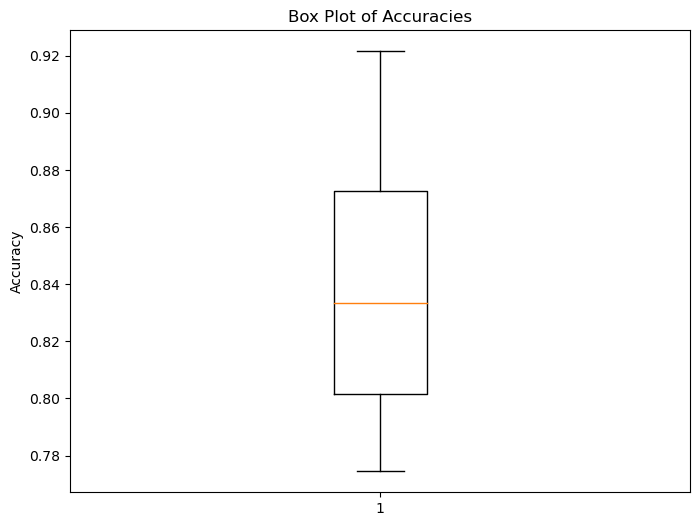

In [52]:
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
run(xgboost, 20)

## LGBM

average time: 1.949433 sec
average accuracy: 0.87451

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       0.60      1.00      0.75         3
           5       1.00      0.40      0.57         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         4
           8       0.75      0.75      0.75         4
           9       1.00      1.00      1.00         3
          10       0.75      1.00      0.86         3
          11       1.00      0.86      0.92         7
          12       1.00      0.75      0.86         4
          13       1.00      1.00      1.00         4
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         3
          16       1.00    

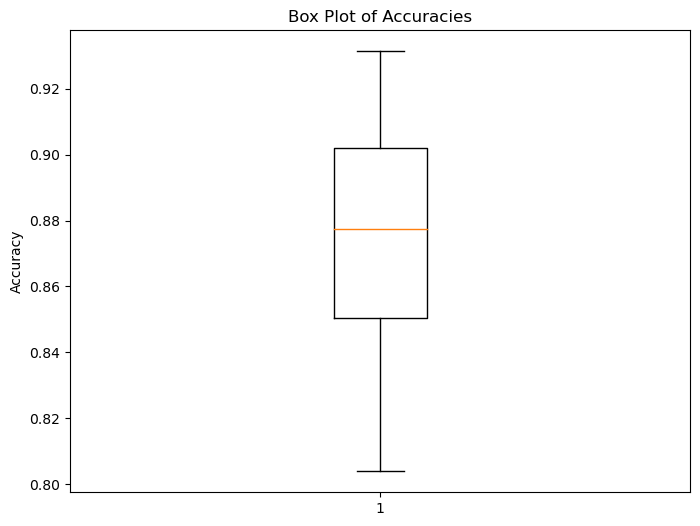

In [53]:
lgb = LGBMClassifier(verbose=-1)
run(lgb, 20)

# Clustering (image features)

## K-Means

In [54]:
kmeans = KMeans(n_clusters=30)
run0(kmeans)

/home/mohammad/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


    Label  Cluster
0       1       21
1       1       21
2       1       20
3       1       18
4       1       10
5       1       28
6       1       28
7       1       28
8       1        0
9       1       21
10      1       21
11      1       10
12      2        4
13      2       18
14      2        4
15      2        4
16      2       18
17      2        4
18      2       18
19      2        4
20      2        4
21      2        5

Time:          1.041553 sec
Silhouette:    0.407521
Dunn Index:    0.033554
ARI:           0.076213
NMI:           0.450248
Homogeneity:   0.439517
Completeness:  0.461516
V-Measure:     0.450248


## Agglomerative

In [55]:
agg = AgglomerativeClustering(n_clusters=30)
run0(agg)

    Label  Cluster
0       1       10
1       1       10
2       1        0
3       1       18
4       1       21
5       1        0
6       1        0
7       1        0
8       1       27
9       1       10
10      1       10
11      1       21
12      2       13
13      2       18
14      2       13
15      2       13
16      2       18
17      2       13
18      2       18
19      2       13
20      2       13
21      2        9

Time:          0.026268 sec
Silhouette:    0.40529
Dunn Index:    0.052651
ARI:           0.092434
NMI:           0.469392
Homogeneity:   0.458865
Completeness:  0.480415
V-Measure:     0.469392


## Spectral Clustering

In [56]:
spectral_clustering = SpectralClustering(n_clusters=30, affinity='nearest_neighbors')
run0(spectral_clustering)

    Label  Cluster
0       1        5
1       1        5
2       1        3
3       1       21
4       1        9
5       1        3
6       1        3
7       1        3
8       1       16
9       1        5
10      1        5
11      1        9
12      2        8
13      2       21
14      2        8
15      2        8
16      2       21
17      2        7
18      2       10
19      2        8
20      2        8
21      2       11

Time:          0.941071 sec
Silhouette:    0.36807
Dunn Index:    0.015997
ARI:           0.093606
NMI:           0.467846
Homogeneity:   0.467096
Completeness:  0.468598
V-Measure:     0.467846


## Gaussian Mixture

In [57]:
gmm = GaussianMixture(n_components=30)
run0(gmm)

    Label  Cluster
0       1        4
1       1        4
2       1       27
3       1       23
4       1        1
5       1       27
6       1       27
7       1       27
8       1       19
9       1       11
10      1       11
11      1        1
12      2        7
13      2       23
14      2        7
15      2        7
16      2       23
17      2        7
18      2       23
19      2        7
20      2        7
21      2       13

Time:          4.9872 sec
Silhouette:    0.418947
Dunn Index:    0.027015
ARI:           0.081629
NMI:           0.451989
Homogeneity:   0.440291
Completeness:  0.464325
V-Measure:     0.451989
